## Read the features. Eliminate those with correlation greater than 0.7
## Construct minimum spanning tree.

In [1]:
import os
import pandas as pd
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
cd '/home/raghuram/Desktop/radiomics/TEXTURES/results'

In [ ]:
home = '/home/raghuram/Desktop/radiomics/TEXTURES/results'

In [4]:
features_folder = '/home/raghuram/Desktop/radiomics/TEXTURES'

In [5]:
folder_list = os.listdir(os.getcwd())

In [6]:
csv_file_dict = {}

In [7]:
def get_csv_files():
    for folder in folder_list:
        csv_file_list = sorted(os.listdir(os.path.join(home, folder, 'linear_regression', 'without_idh1')), key=lambda x: int(x.split('_')[0]))
        csv_file_dict[folder] = csv_file_list
        return csv_file_dict

In [8]:
modality_csv_files = get_csv_files()

In [9]:
df = pd.read_csv(os.path.join(home, 't2f', 'linear_regression', 'without_idh1', modality_csv_files['t2f'][0]))

In [10]:
features = list(df['response_variable'].unique())

In [11]:
alpha = 0.05
m = len(features)*5
bonferroni_correction_factor = alpha/(m)

In [12]:
# TODO: Make this function faster
def filter_relevant_features():
    results_dict = {}
    for modality in modality_csv_files.keys():
        results_dict[modality] = {}
        csv_file_list = modality_csv_files[modality]
        for csv_file in csv_file_list:
            df = pd.read_csv(os.path.join(home, modality, 'linear_regression', 'without_idh1', csv_file))
            experiment_number = csv_file.split('_')[0]   
            results_dict[modality][experiment_number] = []
            for idx, feature in enumerate(features):
                feature_df = df[df['response_variable'] == feature]
    #             print(feature_df.head())
                if np.all(feature_df['pvals']>bonferroni_correction_factor):
                    results_dict[modality][experiment_number].append(feature)
                    continue
                else:
                    continue
    return results_dict

In [13]:
results_dict = filter_relevant_features()

In [14]:
# results_dict['t2f']['1']

In [17]:
def load_relevant_features(modality, experiment_number, labels = ['IDH1', '1p_19q_co_del_status']):
    try:
        assert(1<=experiment_number<=25)
        relevant_features = results_dict[modality][str(experiment_number)]
        df = pd.read_csv(os.path.join(home, 't2f', 'linear_regression', 
                                     'without_idh1', str(experiment_number)+'_'+modality+'.csv'))
        df = pd.read_csv(os.path.join(features_folder, 'expt_'+modality+'.csv'))
        df = df[df['experiment_number'] == experiment_number]
        required_columns = results_dict[modality][str(experiment_number)]
        df = df[df.columns[df.columns.isin(required_columns)]]
        return df
    except AssertionError as e:
        print('Experiment number cannot be greater than twenty-five or less than one')

In [18]:
df = load_relevant_features('t2f', 1)
codel_labels = df['1p_19q_co_del_status']
idh_labels = df['IDH1']
df.drop(columns=['IDH1', '1p_19q_co_del_status'], inplace=True)

In [19]:
df.head()

,GLRLM_LRLGE,GLSZM_GLN,GLSZM_HGZE,GLSZM_LGZE,GLSZM_SZLGE,GLSZM_ZSV,Global_Kurtosis,Global_Skewness,Global_Variance
0,4.396772,0.130441,23.230704,0.249182,0.045782,0.228979,-0.397103,-0.303488,209.573873
25,4.248677,0.171413,15.911325,0.180610,0.052799,0.117821,-0.148668,-0.193120,101.851827
50,2.127433,0.148013,20.726741,0.152537,0.041559,0.005152,-0.040352,-0.074814,128.897097
75,3.063390,0.132419,26.008143,0.149950,0.025335,0.043605,0.191867,-0.402790,183.675355
100,2.772417,0.135833,22.056140,0.263262,0.046632,0.634392,0.908447,-0.900436,171.243296


In [20]:
df.corr()

,GLRLM_LRLGE,GLSZM_GLN,GLSZM_HGZE,GLSZM_LGZE,GLSZM_SZLGE,GLSZM_ZSV,Global_Kurtosis,Global_Skewness,Global_Variance
GLRLM_LRLGE,1.000000,0.056317,-0.099873,0.149759,-0.214400,0.111534,-0.534461,0.225480,0.672696
GLSZM_GLN,0.056317,1.000000,-0.703558,0.440815,0.367485,0.081616,-0.175531,0.277540,0.194987
GLSZM_HGZE,-0.099873,-0.703558,1.000000,-0.608134,-0.656595,-0.031420,0.375812,-0.604954,-0.156374
GLSZM_LGZE,0.149759,0.440815,-0.608134,1.000000,0.751188,0.436259,-0.581411,0.385662,0.379769
GLSZM_SZLGE,-0.214400,0.367485,-0.656595,0.751188,1.000000,0.326860,-0.285073,0.377423,0.020010
GLSZM_ZSV,0.111534,0.081616,-0.031420,0.436259,0.326860,1.000000,-0.263036,-0.038260,0.367516
Global_Kurtosis,-0.534461,-0.175531,0.375812,-0.581411,-0.285073,-0.263036,1.000000,-0.698655,-0.578591
Global_Skewness,0.225480,0.277540,-0.604954,0.385662,0.377423,-0.038260,-0.698655,1.000000,0.129583
Global_Variance,0.672696,0.194987,-0.156374,0.379769,0.020010,0.367516,-0.578591,0.129583,1.000000


In [21]:
def get_features_to_exclude(df):
    K = np.array(df.corr())
    x, y = np.where(np.abs(K)>=0.7)
    correlated_pair = []
    drop_columns = []
    for value in zip(x,y):
        if value[0] == value[1]:
            continue
        if (value[1], value[0]) in correlated_pair:
            continue
        correlated_pair.append(value)
        drop_columns.append(value[1])
    
    return drop_columns, correlated_pair

In [22]:
drop_columns, correlated_pair = get_features_to_exclude(df)

In [23]:
def drop_correlated_features(df, drop_columns):
    dropped_feature_names = []
    for index in drop_columns:
        dropped_feature_names.append(df.columns[index])
    dropped_df = df.drop(columns=dropped_feature_names, inplace=False)
    return dropped_df

In [24]:
filtered_df = drop_correlated_features(df, drop_columns)

In [25]:
A = np.array(filtered_df.corr())

In [26]:
# Form the graph from this 
import networkx as nx

In [27]:
from matplotlib import pyplot as plt

In [28]:
G = nx.from_numpy_matrix(A)
# From this graph form the minimum spanning tree
K = nx.minimum_spanning_tree(G)

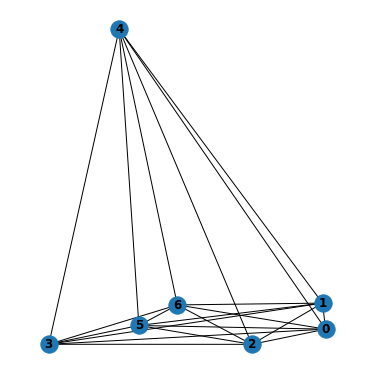

In [29]:
# Plot the graph
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, font_weight='bold')

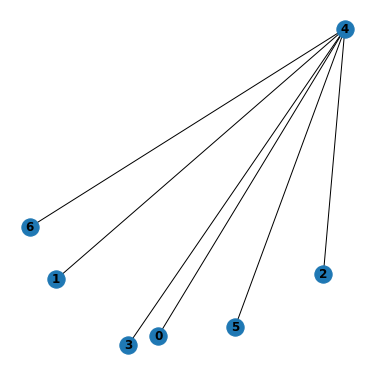

In [30]:
# Plot the minimum spanning tree
plt.figure(figsize=(5,5))
nx.draw(K, with_labels=True, font_weight='bold')

In [41]:
adj_mst = np.abs(nx.adj_matrix(K))

In [42]:
adj_mst.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.53446123,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.1755314 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.58141061,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.26303638,
         0.        , 0.        ],
        [0.53446123, 0.1755314 , 0.58141061, 0.26303638, 0.        ,
         0.69865463, 0.57859068],
        [0.        , 0.        , 0.        , 0.        , 0.69865463,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.57859068,
         0.        , 0.        ]])

In [48]:
def compute_graph_laplacian_matrix(graph):
    return np.abs(nx.laplacian_matrix(graph).todense())

In [49]:
L = compute_graph_laplacian_matrix(K)

In [50]:
def compute_fourier_bases(graph_laplacian_matrix):
    return np.linalg.eigh(graph_laplacian_matrix)

In [59]:
eigenvalues, eigenvectors = compute_fourier_bases(L)

In [60]:
X = np.array(filtered_df)

In [88]:
# Normalize the features within group to have unit norm
# Use five-fold cross-validation to see if the results make sense
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [91]:
scaler = StandardScaler()
cv = StratifiedKFold(n_splits=2, random_state=2019)

In [92]:
X_normalized = scaler.fit_transform(X)

In [102]:
# Obtain the graph Fourier transform for each graph signal
X_normalized_graph = np.dot(eigenvectors.transpose(), X_normalized.transpose()).T
# Each row in X_normalized_graph represents a patient

In [105]:
np.where(idh_labels == 0)

(array([ 0,  5, 11, 18, 22, 26, 28, 33, 34, 36, 45, 48, 49, 53, 57, 58, 63,
        64, 65, 66, 76]),)

In [158]:
X_non_mut_graph = X_normalized_graph[np.where(idh_labels == 0)]
X_mut_graph = X_normalized_graph[np.where(idh_labels == 1)]

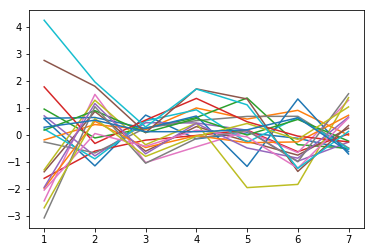

In [157]:
for signal in X_non_mut_graph:
    plt.plot(np.linspace(1,7,num=7), signal.T)
    

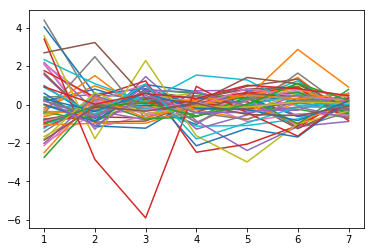

In [159]:
for signal in X_mut_graph:
    plt.plot(np.linspace(1,7,num=7), signal.T)

In [140]:
np.linspace(1,7,num=7)

array([1., 2., 3., 4., 5., 6., 7.])

In [122]:
X_normalized_graph[0,:]

matrix([[ 0.59131275, -1.15573673,  0.73183787, -0.15227353,  0.07434623,
         -0.13106278, -0.54133575]])

In [68]:
pipe = Pipeline(steps=[('scaler', scaler), ('kfold', )])

KFold(n_splits=5, random_state=42, shuffle=False)

In [66]:
pipe = Pipeline(sst)

In [ ]:
df['T1CE'] = df['mat_file_name']

In [ ]:
labels = pd.read_csv('Patient_Information_and_Metadata.csv')
labels = labels[['T1CE', 'IDH1', '1p_19q_co_del_status', 'days_to_last_or_death']]

In [ ]:
df = df.merge(labels, on='T1CE')

In [ ]:
df.shape

In [ ]:
df = df[df['experiment_number'] == 1]
df.drop(columns=['mat_file_name', 'experiment_number', 'parameters_Algo', 
                 'parameters_Ng', 'parameters_Scale', 'T1CE', 'IDH1', 'days_to_last_or_death'], inplace=True)

In [ ]:
y = df['1p_19q_co_del_status']

In [ ]:
df.drop(columns=['1p_19q_co_del_status'], inplace=True)

In [ ]:
corr_matrix = np.array(df.corr())

In [ ]:
import copy
A = copy.deepcopy(corr_matrix)
A[A>0.7]=0
A[A<-0.7]=0
A[A!= 0] = 1

In [ ]:
A

In [ ]:
import networkx as nx

In [ ]:
G = nx.from_numpy_matrix(A)
T = nx.minimum_spanning_tree(G)

In [ ]:
T

In [ ]:
A_adj = nx.adjacency_matrix(T)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(42, 42))
ax=plt.gca()
sns.heatmap(A.astype(int),annot=True, fmt="d", cbar=False,cmap="BuPu")
ax.set_axis_off()
plt.show()

In [ ]:
nx.degree(T)

In [ ]:
plt.figure(figsize=(25, 25))
nx.draw(T, with_labels=True, font_weight='bold')

In [ ]:
nx.algorithms.cycles.find_cycle(T)

In [ ]:
D = np.zeros((A.shape[0], A.shape[1]))

In [ ]:
for node, degree in T.degree():
    D[node][node] = degree

In [ ]:
plt.imshow(D)
plt.colorbar()

In [ ]:
L = nx.linalg.laplacian_matrix(T)

In [ ]:
fig = plt.figure(figsize=(42,42))
ax=plt.gca()
sns.heatmap(L.toarray().astype(int),annot=True, fmt="d", cbar=False,cmap="BuPu")
ax.set_axis_off()
plt.show()

In [ ]:
def eig_decompose_laplacian(L):
    eigvalues, eigvectors = np.linalg.eigh(L)
    idx = np.argsort(eigvalues)[::-1]
    sorted_eig = eigvalues[idx]
    sorted_eigv = eigvectors[idx]
    return (sorted_eig, sorted_eigv)

In [ ]:
# L is a sparse compressed matrix
# Convert to dense before eigendecomposition
eigvalues, eigvectors = eig_decompose_laplacian(L.todense().astype(int))
np.diag(np.dot(eigvectors, eigvectors.T))

In [ ]:
X = np.array(df).transpose()

### The input_signal, $\matrix{X}$ is a graph signal
### $\matrix{X}$ $\in$ $\mathcal{R}^{NxF}$, 
### where $N$ is number of nodes and $F$ is the number of features

In [ ]:
X.shape

### Compute the graph Fourier Transform
### $\matrix{X}_{GFT}$ $=$ $\matrix{V}^{H}{X}$

### The column $i$, $\matrix{X}_{i}$ represents the graph signal for the $i^{th}$ patient

In [ ]:
def compute_graph_fourier_transform(V, input_graph_signal):
    assert(X.shape[0] == V.shape[0])
    X_gft = np.dot(V.transpose(), input_graph_signal)
    return X_gft

In [ ]:
X_gft = compute_graph_fourier_transform(eigvectors, X)

In [ ]:
from pygsp import graphs, plotting, filters

In [ ]:
G_pygsp = graphs.Graph(A_adj)

In [ ]:
G_pygsp.set_coordinates()
plotting.plot_graph(G_pygsp)

In [ ]:
plotting.plot_signal(G_pygsp, signal=s)

In [ ]:
plotting.plot_signal(G_pygsp, signal=X[:,105])